stage1_sample_submission.csv
stage1_solution.csv
stage1_test
stage1_test 2
stage1_train
stage1_train_labels.csv
stage2_sample_submission_final.csv
stage2_test_final



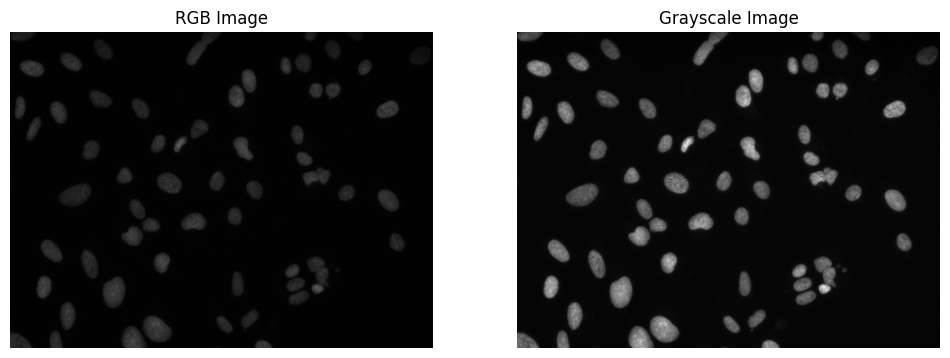

Original Image Shape: (520, 696, 3)
New Image Shape: (520, 696)


In [3]:
import numpy as np
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import cv2

from subprocess import check_output

# List files in the directory
print(check_output(["ls", "./data-science-bowl-2018"]).decode("utf8"))

# Suppress warnings
warnings.filterwarnings('ignore')

# Stephen Bailey solution
# https://www.kaggle.com/stkbailey/teaching-notebook-for-total-imaging-newbies
# and an in depth info from https://www.kaggle.com/code/akshayt19nayak/getting-started-image-processing-basics

# Define the path to the images directory
images_dir = pathlib.Path('./data-science-bowl-2018/stage1_train')

# Get paths to all image files
training_paths = images_dir.glob('*/images/*.png')
training_sorted = sorted([x for x in training_paths])

# Select an image path
im_path = training_sorted[45]

# Read the image
bgrimg = cv2.imread(str(im_path))

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the RGB image
axs[0].imshow(cv2.cvtColor(bgrimg, cv2.COLOR_BGR2RGB))
axs[0].set_title('RGB Image')
axs[0].axis('off')

# Convert the image to grayscale
grayimg = cv2.cvtColor(bgrimg, cv2.COLOR_BGR2GRAY)

# Plot the grayscale image
axs[1].imshow(grayimg, cmap='gray')
axs[1].set_title('Grayscale Image')
axs[1].axis('off')

# Show the plot
plt.show()

# Print shapes of the original and grayscale images
print('Original Image Shape:', bgrimg.shape)
print('New Image Shape:', grayimg.shape)

# reduced a dimension when transformed from BGR to grayscale.
# Original Image Shape: (520, 696, 3)
# New Image Shape: (520, 696)
# grayscale is a range of  shades from black to white. 
# contains only shades of gray and no color, not RGB


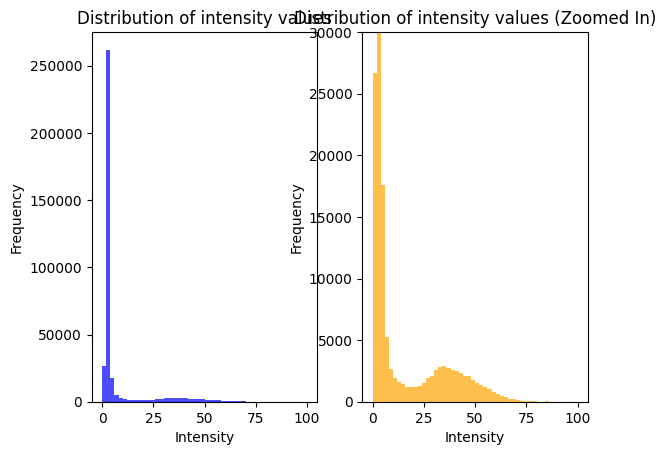

In [5]:
# Plot the distribution of intensity values
# alpha is a parameter used to adjust the transparency of the histogram bars
plt.subplot(1, 2, 1)
plt.hist(grayimg.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of intensity values')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

# to check if the peak in prev histogram we see is actually present, zoom in
plt.subplot(1, 2, 2)
plt.hist(grayimg.flatten(), bins=50, color='orange', alpha=0.7)
plt.ylim(0, 30000)
plt.title('Distribution of intensity values (Zoomed In)')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.show()

# 2 prominent peaks
# values around 0 -> count around 250000
# because background takes a lot of space and is black

Text(0.5, 1.0, 'K-Means')

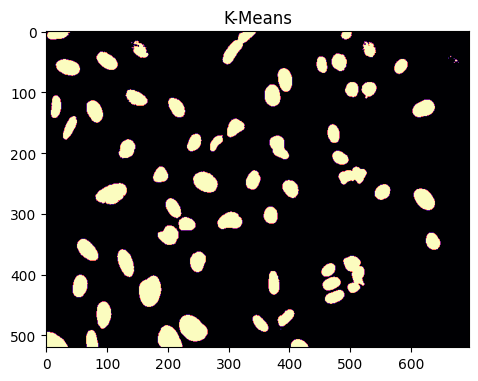

In [8]:
# to seperate nuclei from the background we need to find a treshold value (from hist between 20 and 23)
# K-Means
#Let's see if K-Means does a good job on this data 
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2) #2 separate nuclei from backgroun
# pip install threadpoolctl==3.1.0 to avoid error
kmeans.fit(grayimg.reshape(grayimg.shape[0]*grayimg.shape[1],1))
mask = kmeans.labels_.reshape(520,696)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(mask,cmap='magma')
plt.title('K-Means')

In [9]:
# To get a count of the total number of nuclei -> ndimage.label function
# which labels features (pixels) in an array based on their interconnectedness
# default structure will be used
# [[0,1,0],
# [1,1,1],
# [0,1,0]]
from scipy import ndimage
labels,nlabels=ndimage.label(mask)
print('There are',nlabels,'distinct nuclei in the mask.')

There are 70 distinct nuclei in the mask.
